<h1>STXBP1 genotype-phenotype correlation  analysis</h1>
<p>todo</p>

In [1]:
import genophenocorr
print(f"Using genophenocorr version {genophenocorr.__version__}")

Using genophenocorr version 0.1.1dev


In [2]:
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')

Loaded HPO v2023-10-09


## Select transcript

We use MANE transcript:

In [3]:
tx_id = 'NM_003165.6'

In [4]:
from genophenocorr.preprocessing import configure_caching_cohort_creator

cohort_creator = configure_caching_cohort_creator(hpo, timeout=20)

In [5]:
from ppktstore.registry import configure_phenopacket_registry
from genophenocorr.preprocessing import load_phenopackets

cohort_name = 'STXBP1'
phenopacket_store_release = '0.1.18'

registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))

cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
del phenopackets
validation.summarize()


Patients Created:  41%|████▏     | 192/463 [00:00<00:00, 516.95it/s]

Expected a result but got an Error for variant: 9_127684373_127684373_A_A
{"error":"request for consequence of [A] matches reference [A]"}


Patients Created: 100%|██████████| 463/463 [00:01<00:00, 335.33it/s]


Validated under none policy
Showing errors and warnings
Load phenopackets
  patient #29
    phenotype-features
     warnings:
     ·Triggered by physical trauma [HP:0031135] is not a descendant of Phenotypic abnormality [HP:0000118]
  patient #227
    phenotype-features
     warnings:
     ·Death in childhood [HP:0003819] is not a descendant of Phenotypic abnormality [HP:0000118]
  patient #239
    variants
     warnings:
     ·Patient STX_23708187_T23289 has no variants to work with
      #0
       warnings:
       ·Patient STX_23708187_T23289 has an error with variant 9_127684373_127684373_A_A. Try again or remove variant form testing... Expected a result but got an Error. See log for details.
  patient #359
    phenotype-features
     warnings:
     ·Death in adolescence [HP:0011421] is not a descendant of Phenotypic abnormality [HP:0000118]


<h2>CohortViewer</h2>
<p>The CohortViewer class offers various methods to create tables and graphics to view the data in the cohort.
It is still very much in progress</p>

In [6]:
from IPython.display import display, HTML
from genophenocorr.view import CohortViewable

viewer = CohortViewable(hpo=hpo)
html = viewer.process(cohort=cohort, transcript_id=tx_id)
display(HTML(html))

HPO Term,ID,Annotation Count
Global developmental delay,HP:0001263,230
Absent speech,HP:0001344,152
Infantile spasms,HP:0012469,143
Hypsarrhythmia,HP:0002521,120
"Intellectual disability, severe",HP:0010864,106
Inability to walk,HP:0002540,93
Generalized tonic seizure,HP:0010818,92
Multifocal epileptiform discharges,HP:0010841,86
Bilateral tonic-clonic seizure,HP:0002069,77
EEG with burst suppression,HP:0010851,75


<Axes: title={'center': 'Syntaxin-binding protein 1\ntranscript: NM_003165.6, protein: NP_003156.1'}>

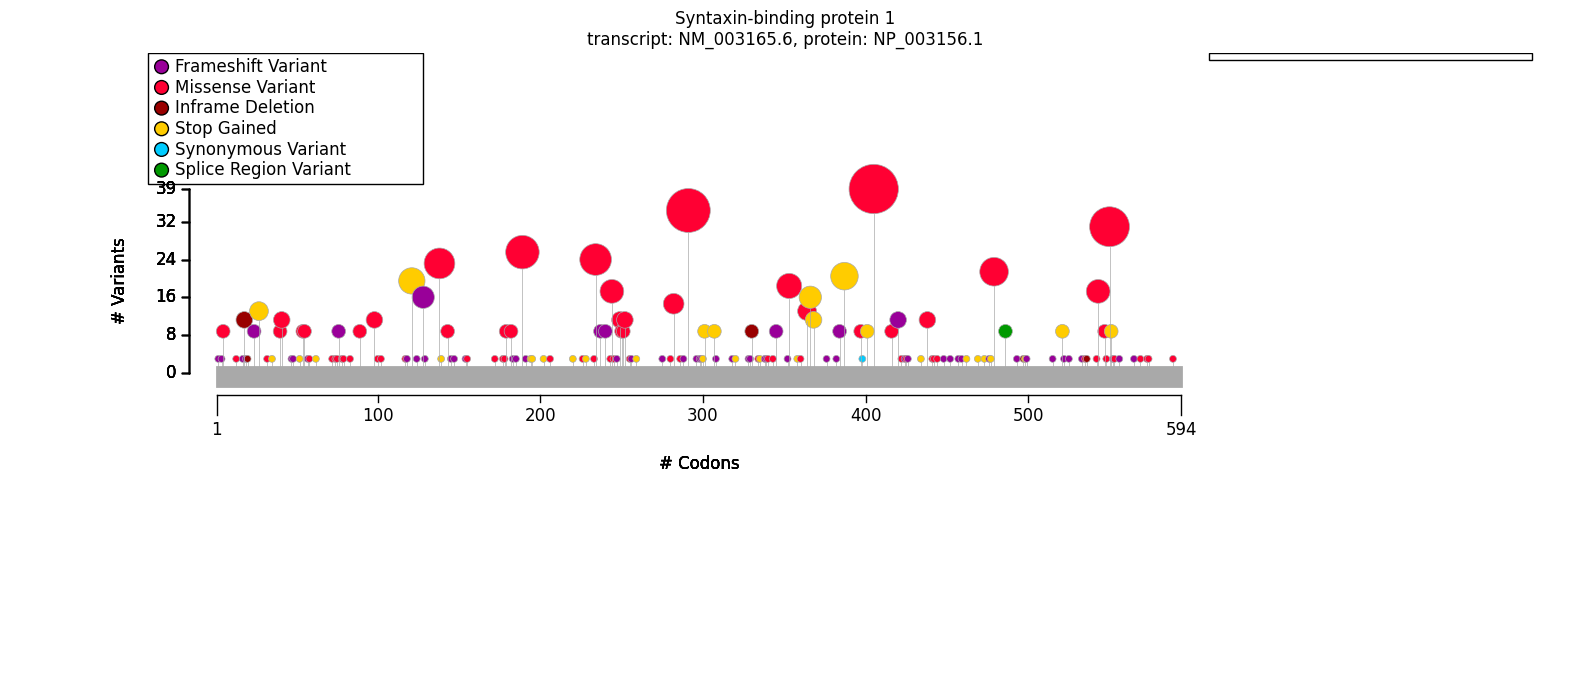

In [7]:
from genophenocorr.preprocessing import UniprotProteinMetadataService
from genophenocorr.model.genome import GRCh38
from genophenocorr.preprocessing import VVMultiCoordinateService
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(tx_id)
from genophenocorr.preprocessing import UniprotProteinMetadataService
pms = UniprotProteinMetadataService()
protein_meta = pms.annotate('NP_003156.1')
from genophenocorr.view import ProteinVisualizable, ProteinVisualizer
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

## Analysis

In [8]:
from genophenocorr.analysis import configure_cohort_analysis, CohortAnalysisConfiguration

config = CohortAnalysisConfiguration()
config.pval_correction = 'fdr_bh'
config.heuristic_strategy()
analysis = configure_cohort_analysis(cohort, hpo, config=config)

In [9]:
from genophenocorr.analysis.predicate import PatientCategories
from genophenocorr.model import VariantEffect
from genophenocorr.analysis.predicate.genotype import VariantPredicates

is_missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=tx_id)
missense = analysis.compare_hpo_vs_genotype(is_missense)
missense.summarize(hpo, category=PatientCategories.YES)

MISSENSE_VARIANT on NM_003165.6                       Yes             No  \
                                                    Count Percent  Count   
Febrile seizure (within the age range of 3 mont...  15/18     83%    3/7   
Seizure precipitated by febrile infection [HP:0...  15/18     83%    3/7   
Infection-related seizure [HP:0032892]              15/18     83%    3/7   
Atonic seizure [HP:0010819]                         12/15     80%    3/7   
Focal impaired awareness autonomic seizure [HP:...    4/7     57%    0/4   
...                                                   ...     ...    ...   
Abnormal basal ganglia morphology [HP:0002134]        2/8     25%    1/3   
Leukoencephalopathy [HP:0002352]                      3/9     33%    2/4   
Abnormal metencephalon morphology [HP:0011283]        1/3     33%    2/4   
Atrophy/Degeneration affecting the cerebrum [HP...  19/25     76%  10/12   
Abnormal hindbrain morphology [HP:0011282]            1/3     33%    2/4   

MISSENSE_VARIANT on NM_003165.6                                       \
                                                   Percent   p value   
Febrile seizure (within the age range of 3 mont...     43%  0.066362   
Seizure precipitated by febrile infection [HP:0...     43%  0.066362   
Infection-related seizure [HP:0032892]                 43%  0.066362   
Atonic seizure [HP:0010819]                            43%  0.144661   
Focal impaired awareness autonomic seizure [HP:...      0%  0.193939   
...                                                    ...       ...   
Abnormal basal ganglia morphology [HP:0002134]         33%  1.000000   
Leukoencephalopathy [HP:0002352]                       50%  1.000000   
Abnormal metencephalon morphology [HP:0011283]         50%  1.000000   
Atrophy/Degeneration affecting the cerebrum [HP...     83%  1.000000   
Abnormal hindbrain morphology [HP:0011282]             50%  1.000000   

MISSENSE_VARIANT on NM_003165.6                                       
                                                   Corrected p value  
Febrile seizure (within the age range of 3 mont...               1.0  
Seizure precipitated by febrile infection [HP:0...               1.0  
Infection-related seizure [HP:0032892]                           1.0  
Atonic seizure [HP:0010819]                                      1.0  
Focal impaired awareness autonomic seizure [HP:...               1.0  
...                                                              ...  
Abnormal basal ganglia morphology [HP:0002134]                   1.0  
Leukoencephalopathy [HP:0002352]                                 1.0  
Abnormal metencephalon morphology [HP:0011283]                   1.0  
Atrophy/Degeneration affecting the cerebrum [HP...               1.0  
Abnormal hindbrain morphology [HP:0011282]                       1.0  

[102 rows x 6 columns]

Done for now.